<a href="https://colab.research.google.com/github/tayfununal/hamiltonian/blob/main/verlet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#verlet
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

plt.style.use('seaborn-poster')
#plt.style.use("seaborn-v0_8")

In [3]:
"""
def verlet(initial_point=[0., 1.], t_interval=[0.,2*np.math.pi], h=20):
  t = np.linspace(t_interval[0], t_interval[1], h)
  h = t[1] - t[0]

  q = np.zeros(t.shape[0])
  p = np.zeros(t.shape[0])

  q[0] = initial_point[0]
  p[0] = initial_point[1]
  
  for i in range(0 ,t.shape[0]-1):
    ara_p = p[i] - h/2 * q[i]

    q[i+1] = q[i] + h * (p[i] - h/2 * q[i])

    p[i+1] = ara_p - h/2 * (q[i] + h * (p[i] - h/2 * q[i]))
  
  z = np.concatenate((q.reshape(-1,1), p.reshape(-1,1)) , axis=1)
  return z, t, t_interval, initial_point, h
"""

In [ ]:
""""
z, t, t_interval, initial_point, h = verlet()

def grand_truth_plot(h = 30):
  t = np.linspace(0,2*np.pi,h)
  q = np.sin(t)
  p = np.cos(t)
  plt.scatter(q,p)

def pred_plot(q, p):
  plt.plot(q[:, ], p[:,], c = "red")
  plt.xlabel('q')
  plt.ylabel('p')

plt.figure(figsize = (4, 4))

pred_plot(q=z[:,0], p=z[:,1])

grand_truth_plot()
plt.show()
"""

In [5]:
def verlet(T, V, initial_point=[0., 1.], t_interval=[0.,2*np.math.pi], h=20):
  t = np.linspace(t_interval[0], t_interval[1], h)
  h = t[1] - t[0]

  q = np.zeros(t.shape[0])
  p = np.zeros(t.shape[0])

  q[0] = initial_point[0]
  p[0] = initial_point[1]

  # Derivative of Potential Energy
  def dV(q_0=tf.constant(1.0)):
    q_0 = tf.constant(q_0)
    with tf.GradientTape() as g:
        g.watch(q_0)
        y = V(q_0)
    return g.gradient(y, q_0)

  # Derivative of Kinetic Energy
  def dT(p_0=tf.constant(1.0)):
    p_0 = tf.constant(p_0)
    with tf.GradientTape() as g:
        g.watch(p_0)
        y = T(p_0)
    return g.gradient(y, p_0)
  
  for i in range(0 ,t.shape[0]-1):
    ara_p = p[i] - (h/2) * dV(q[i])

    q[i+1] = q[i] + (h) * (ara_p)

    p[i+1] = ara_p - (h/2) * (q[i+1])
  
  z = np.concatenate((q.reshape(-1,1), p.reshape(-1,1)) , axis=1)
  return T, V, z, t, t_interval, initial_point, h

In [7]:
"""
def T(p):
  return (1/2)* p**2

def V(q):
  return (1/2) * q**2
"""

In [8]:
""" 
T, V, z, t, t_interval, initial_point, h = verlet(T, V, initial_point=[0., 1.], t_interval=[0.,2*np.math.pi], h=10)
"""

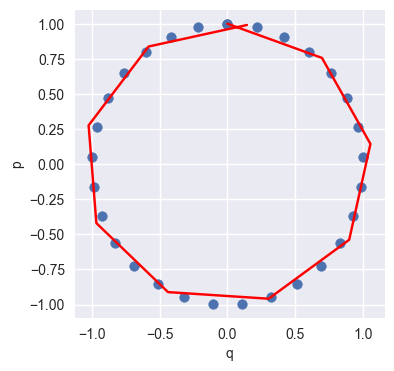

In [9]:
"""
def grand_truth_plot(h = 30):
  t = np.linspace(0,2*np.pi,h)
  q = np.sin(t)
  p = np.cos(t)
  plt.scatter(q,p)

def pred_plot(q, p):
  plt.plot(q[:, ], p[:,], c = "red")
  plt.xlabel('q')
  plt.ylabel('p')

plt.figure(figsize = (4, 4))

pred_plot(q=z[:,0], p=z[:,1])

grand_truth_plot()
plt.show()
"""